In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm
import random as rd

In [3]:
# import some data to play with
digits = load_digits()
X = digits.data
y = digits.target

In [4]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

# Convert the data to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train)
y_train_tensor = F.one_hot(y_train_tensor, num_classes=10).float()
X_val_tensor = torch.from_numpy(X_val).float()
y_val_tensor = torch.from_numpy(y_val)
y_val_tensor = F.one_hot(y_val_tensor, num_classes=10).float()

In [5]:
X_train_tensor[:2]

tensor([[ 0.,  0.,  2., 11., 15.,  2.,  0.,  0.,  0.,  0., 12.,  6., 11.,  9.,
          0.,  0.,  0.,  4., 11.,  0.,  7., 16.,  0.,  0.,  0.,  5.,  6.,  0.,
          1., 16.,  6.,  0.,  0.,  5.,  4.,  0.,  0., 10.,  7.,  0.,  0.,  0.,
         10.,  0.,  0., 10.,  5.,  0.,  0.,  0., 13.,  2.,  6., 12.,  0.,  0.,
          0.,  0.,  4., 16., 12.,  1.,  0.,  0.],
        [ 0.,  0., 14., 16., 16., 16.,  2.,  0.,  0.,  7., 16.,  5.,  1.,  0.,
          0.,  0.,  0., 14., 13.,  7.,  3.,  0.,  0.,  0.,  0.,  4., 12., 13.,
         16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  0.,  0.,  0.,  0.,
          0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  5., 14., 16.,  3.,  0.,  0.,
          0.,  1., 15., 11.,  4.,  0.,  0.,  0.]])

In [6]:
(X_train_tensor.shape[0], X_val_tensor.shape[0])

(1617, 180)

In [21]:
# Define the MLP architecture
class Digits_MLP(nn.Module):
    def __init__(self):
        super(Digits_MLP, self).__init__()
        self.ly1 = nn.Linear(64, 50)
        self.ly2 = nn.Linear(50, 50)
        self.ly3 = nn.Linear(50, 10)
        
        
    def forward(self, x):
        out = F.sigmoid(self.ly1(x))
        out = F.sigmoid(self.ly2(out))
        out = self.ly3(out)
        
        return out

In [22]:
# Create an instance of the MLP model
model = Digits_MLP()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.03)

In [23]:
model.eval()
y_pred = model(X_val_tensor)
before_train = criterion(y_pred.squeeze(), y_val_tensor)
print('Test loss before training' , before_train.item())

Test loss before training 2.340059757232666


In [24]:
loss_ar = []

In [26]:
# Train the model
model.train()
epoch = 5000

for epoch in (pbar:= tqdm(range(epoch))):
    # Forward pass
    y_pred = model(X_train_tensor)
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train_tensor)
    loss_ar.append(loss.item())

    pbar.set_postfix_str(f"Loss: {loss.item()}")
    
    # Zero grad
    optimizer.zero_grad()

    # Backward pass
    loss.backward()
    optimizer.step()

100%|██████████| 5000/5000 [00:15<00:00, 322.29it/s, Loss: 0.024247340857982635]


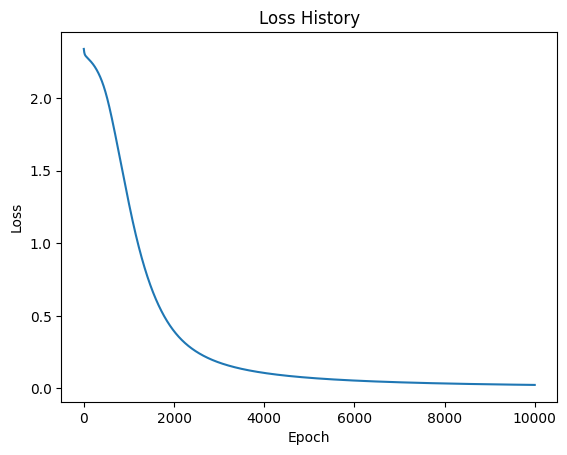

In [27]:
# Plotting the loss history
plt.plot(loss_ar)
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [28]:
model.eval()
y_pred = model(X_val_tensor)
after_train = criterion(y_pred.squeeze(), y_val_tensor)
print('Test loss after training' , after_train.item())

Test loss after training 0.10127783566713333


# Run a test using predefined values

<Figure size 640x480 with 0 Axes>

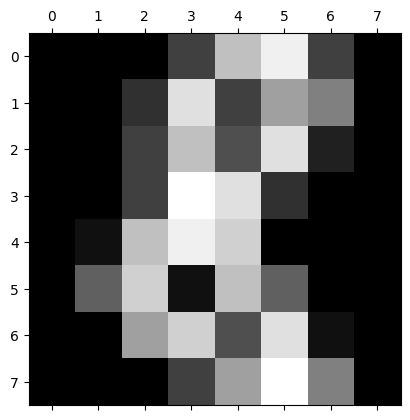

(645, 8)


In [29]:
X_input_indx = rd.randint(0, len(X))

plt.gray()
plt.matshow(digits.images[X_input_indx])
plt.show()
print((X_input_indx, y[X_input_indx]))

In [30]:
model.eval()
output = (model(torch.from_numpy(X[X_input_indx]).float())).abs()

for i in range(10):
    print(digits.target_names[i], ((output / output.sum())[i].item() * 100))

0 9.037556499242783
1 8.456223458051682
2 1.0044101625680923
3 5.688590183854103
4 12.558932602405548
5 7.815594971179962
6 2.889661490917206
7 9.9708691239357
8 39.59338068962097
9 2.9847875237464905
